720
720
3.500417
-77.50042
0.00416666700000001
Coord value near nevado del ruiz (snow): 6.58604022860527
Coord value near pereira: 23.6901998519897


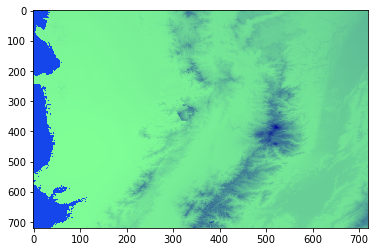

In [64]:
import numpy as np
from PIL import Image
from scipy.misc import toimage
from matplotlib.pyplot import imshow

%matplotlib inline


class ClimatAverages:
    
    def __init__(self, year="2011", month="1", measure="tmin"
                 ,path = "/mnt/hgfs/sharedKali/TB_Data_Meteo/outputs_yearly_v2_2011_2016/average/",):
        
        self.path = str(path)
        self.measure = str(measure)
        self.year = str(year)
        self.month = str(month)
        
        
        records_matrix = open(self.path  + measure + '_' + year + '_' + month + '.asc')
        # Reading the data 
        tmpMatriceData =  [l.strip().split(' ') for l in records_matrix.readlines()[6::]]
        records_matrix.seek(0)
        tmpMatriceInfo =  [l.strip().split(' ') for l in records_matrix.readlines()[:5]]
        self.matriceData = np.array(tmpMatriceData)
        self.matriceInfo = np.array(tmpMatriceInfo)
        records_matrix.close()
        
        self.NCOLS = self.matriceInfo[0,1]
        self.NROW = self.matriceInfo[1,1]
        self.XLLCORNER = self.matriceInfo[2,1]
        self.YLLCORNER = self.matriceInfo[3,1]
        self.CELLSIZE = self.matriceInfo[4,1]
        
        
        self.lons = []
        self.lats = []
        
        basex = float(self.XLLCORNER)
        basey = float(self.YLLCORNER)
        
        # Coordonnées sur x et y 
        for i in range(0, 720):
            self.lons.append(basex)
            self.lats.append(basey)
            basex += float(self.CELLSIZE)
            basey += float(self.CELLSIZE)
        
        self.lons = np.array(self.lons)
        self.lats = np.array(self.lats)
        
        # Minimums and maximums
        self.minLon = self.lons[0]
        self.maxLon = self.lons[-1]
        self.minLat = self.lats[0]
        self.maxLat = self.lats[-1]
        
    # The table is a 720 x 720 table
    # TODO: check the coordinate are in the range (in risaralda) and then convert it (lon and lat) in the range 0-720
    
    
    
    def isOnMap(self, lon, lat):
        if(lon < self.minLon or lon > self.maxLon):
            return False
        elif(lat < self.minLat or lat > self.maxLat):
            return False
        else:
            return True
    
    
    
    def displayMap(self):
        
        
        NewMax = 255
        NewMin = 0
        
        array2 = np.array(self.matriceData) 
        array2range = []
        
        OldMax = float(-8000)
        OldMin = float(8000)
        
        for row in self.matriceData:
            for val in row:
                if (float(val) != -9999) and (float(val) < OldMin):
                    OldMin = float(val)
                if (float(val) != -9999) and (float(val) > OldMax):
                    OldMax = float(val)
        #print("Old max : {} and min : {}".format(OldMax, OldMin))
        
        NewRange = float(NewMax - NewMin)
        NewRange = float(NewRange)
        
        NewMax = float(NewMax)
        NewMin = float(NewMin)
        
        OldRange = float(OldMax) - float(OldMin)
        OldRange = float(OldRange)
        
        # Convert values range (temperature, rain, etc in 0-255 range)
        for row in array2:
            tempLine = []
            for OldValue in row:
                NewValue = 0
                if(float(OldValue) == -9999):
                    color = [20,70,235]
                else:
                    NewValue = float(((float(OldValue) - OldMin) * NewRange) / OldRange) + NewMin
                    color = [int(NewValue)/2, int(NewValue), 150]
                
                tempLine.append(color)
            #print tempLine
            array2range.append(tempLine)
        
        array2range = np.array(array2range)
        
        data = array2range
        data[334, 534] = [255, 0, 0]
        
        img = toimage(data)
        img.show()
        imshow(img, interpolation='nearest', aspect='auto')
    
    
    # Allows to get the nearest value, according to the given coordinates
    #
    # Params: 
    #         - Coordinates [Longitude, Latitude]
    #
    # 
    def getNearestCoordValue(self, coord):
        lon = coord[0]
        lat = coord[1]
        #print("get Longitude and latitude nearest value")
        #print("absolute lons - lon = {} ".format(np.abs(self.lons-lon)))
        #print("argmin thing: {}".format((np.abs(self.lons-lon)).argmin()))
        idxLon = (np.abs(self.lons-lon)).argmin()
        idxLat = (np.abs(self.lats-lat)).argmin()
        #print("idx lon {}  idx lat {} ".format(idxLon, idxLat))
        return self.matriceData[idxLat, idxLon]
        
        
    
test = ClimatAverages(year="2011", month="1", measure="tmean")

#print test.matriceInfo
print test.NCOLS
print test.NROW
print test.YLLCORNER
print test.XLLCORNER
print test.CELLSIZE


test.displayMap()

# coord pereira: [-75.690601,4.8087174]
# coord nevado del ruiz [-75.3188351,4.8919993]
# coord laguna chinganza [-73.75017,4.52529]
# coord neige etc au nord [-72.2975, 6.4941666] #nooooo

#print test.isOnMap(-75.3188351,4.8919993)
#print test.isOnMap(-75.690601,4.8087174)
#print test.isOnMap(-75.690601,4.8087174)
#print test.isOnMap(-72.2975, 6.4941666) # false, not on the map

coordTest = [-75.3188351,4.8919993]
print("Coord value near nevado del ruiz (snow): {}".format(test.getNearestCoordValue(coordTest)))
coordTest = [-75.690601,4.8087174]
print("Coord value near pereira: {}".format(test.getNearestCoordValue(coordTest)))


In [67]:
#years = ["2011", "2012", "2013", "2014", "2015", "2016"]
years = ["2016"]
months = ["1","2","3","4","5","6","7","8","9","10","11","12"]

tmaxAverages = []
tminAverages = []
tmeanAverages = []
dtrAverages = []

for year in years: 
    for month in months:
        #print("loading tmax for {}.{}".format(month,year))
        tmaxAverages.append(ClimatAverages(year, month, measure="tmax"))
        tminAverages.append(ClimatAverages(year, month, measure="tmin"))
        tmeanAverages.append(ClimatAverages(year, month, measure="tmean"))
        dtrAverages.append(ClimatAverages(year, month, measure="dtr"))



for tmax in tmaxAverages:
    print("tmax in pereira: {}".format(tmax.getNearestCoordValue([-75.690601,4.8087174])))

for tmin in tminAverages:
    print("tmin in pereira: {}".format(tmin.getNearestCoordValue([-75.690601,4.8087174])))
    
for tmean in tmeanAverages:
    print("tmean in pereira: {}".format(tmean.getNearestCoordValue([-75.690601,4.8087174])))
    
for dtr in dtrAverages:
    print("dtr in pereira: {}".format(dtr.getNearestCoordValue([-75.690601,4.8087174])))

tmax in pereira: 29.1390000152588
tmax in pereira: 28.7355601501465
tmax in pereira: 29.3629201507568
tmax in pereira: 29.26
tmax in pereira: 28.293759765625
tmax in pereira: 28.1901201629639
tmax in pereira: 28.9187601470947
tmax in pereira: 29.0170001983643
tmax in pereira: 29.1284000396729
tmax in pereira: 28.0206001281738
tmax in pereira: 27.5792000579834
tmax in pereira: 28.0537200164795
tmin in pereira: 18.556840133667
tmin in pereira: 18.5997200775146
tmin in pereira: 18.6267597961426
tmin in pereira: 19.1054000854492
tmin in pereira: 19.076600112915
tmin in pereira: 18.5496399688721
tmin in pereira: 18.4978398895264
tmin in pereira: 17.971960067749
tmin in pereira: 18.0743200683594
tmin in pereira: 17.9921199798584
tmin in pereira: 18.6911999511719
tmin in pereira: 18.0828800964355
tmean in pereira: 23.8479204177856
tmean in pereira: 23.6676397323608
tmean in pereira: 23.9948406219482
tmean in pereira: 24.1827001571655
tmean in pereira: 23.6851806640625
tmean in pereira: 23.369